<a href="https://colab.research.google.com/github/PRANAV7389/Data_analysis/blob/main/BankCustomerSegementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This cell mounts the Google Drive to the Colab environment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the pandas library
import pandas as pd

# Read the CSV file from the specified Google Drive path into a DataFrame named df
df = pd.read_csv('/content/drive/MyDrive/Bank+Customer+Churn/Bank_Churn.csv')

In [ ]:
# Display the first few rows of the DataFrame df to get a glimpse of the data structure and content.
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [ ]:
data_subset = df[['CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited']]

In [ ]:
data_subset.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
data_clean = data_subset.copy()

In [ ]:
data_clean.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
data_clean.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
data_clean.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
import numpy as np

data_clean.Gender = np.where(data_clean.Gender=='Female',1,0)

In [ ]:
data_clean.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       1   42       2       0.00              1   
1          608     Spain       1   41       1   83807.86              1   
2          502    France       1   42       8  159660.80              3   
3          699    France       1   39       1       0.00              2   
4          850     Spain       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
data_clean = pd.get_dummies(data_clean,columns = ['Geography'],dtype='int',prefix="",prefix_sep="")

In [ ]:
data_clean.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  
0               1        101348.88       1       1        0      0  
1               1        112542.58       0       0        0      1  
2               0        113931.57       1       1        0      0  
3               0         93826.63       0       1        0      0  
4               1         79084.10       0       0        0      1

In [ ]:
data_clean.describe()

CreditScore        Gender           Age        Tenure        Balance  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800      0.454300     38.921800      5.012800   76485.889288   
std       96.653299      0.497932     10.487806      2.892174   62397.405202   
min      350.000000      0.000000     18.000000      0.000000       0.000000   
25%      584.000000      0.000000     32.000000      3.000000       0.000000   
50%      652.000000      0.000000     37.000000      5.000000   97198.540000   
75%      718.000000      1.000000     44.000000      7.000000  127644.240000   
max      850.000000      1.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited        France       Germany         Spain  
count  10000.000000  10000.000000  10000.000000  10000.000000  
mean       0.203700      0.501400      0.250900      0.247700  
std        0.402769      0.500023      0.433553      0.431698  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      1.000000      0.000000      0.000000  
75%        0.000000      1.000000      1.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000

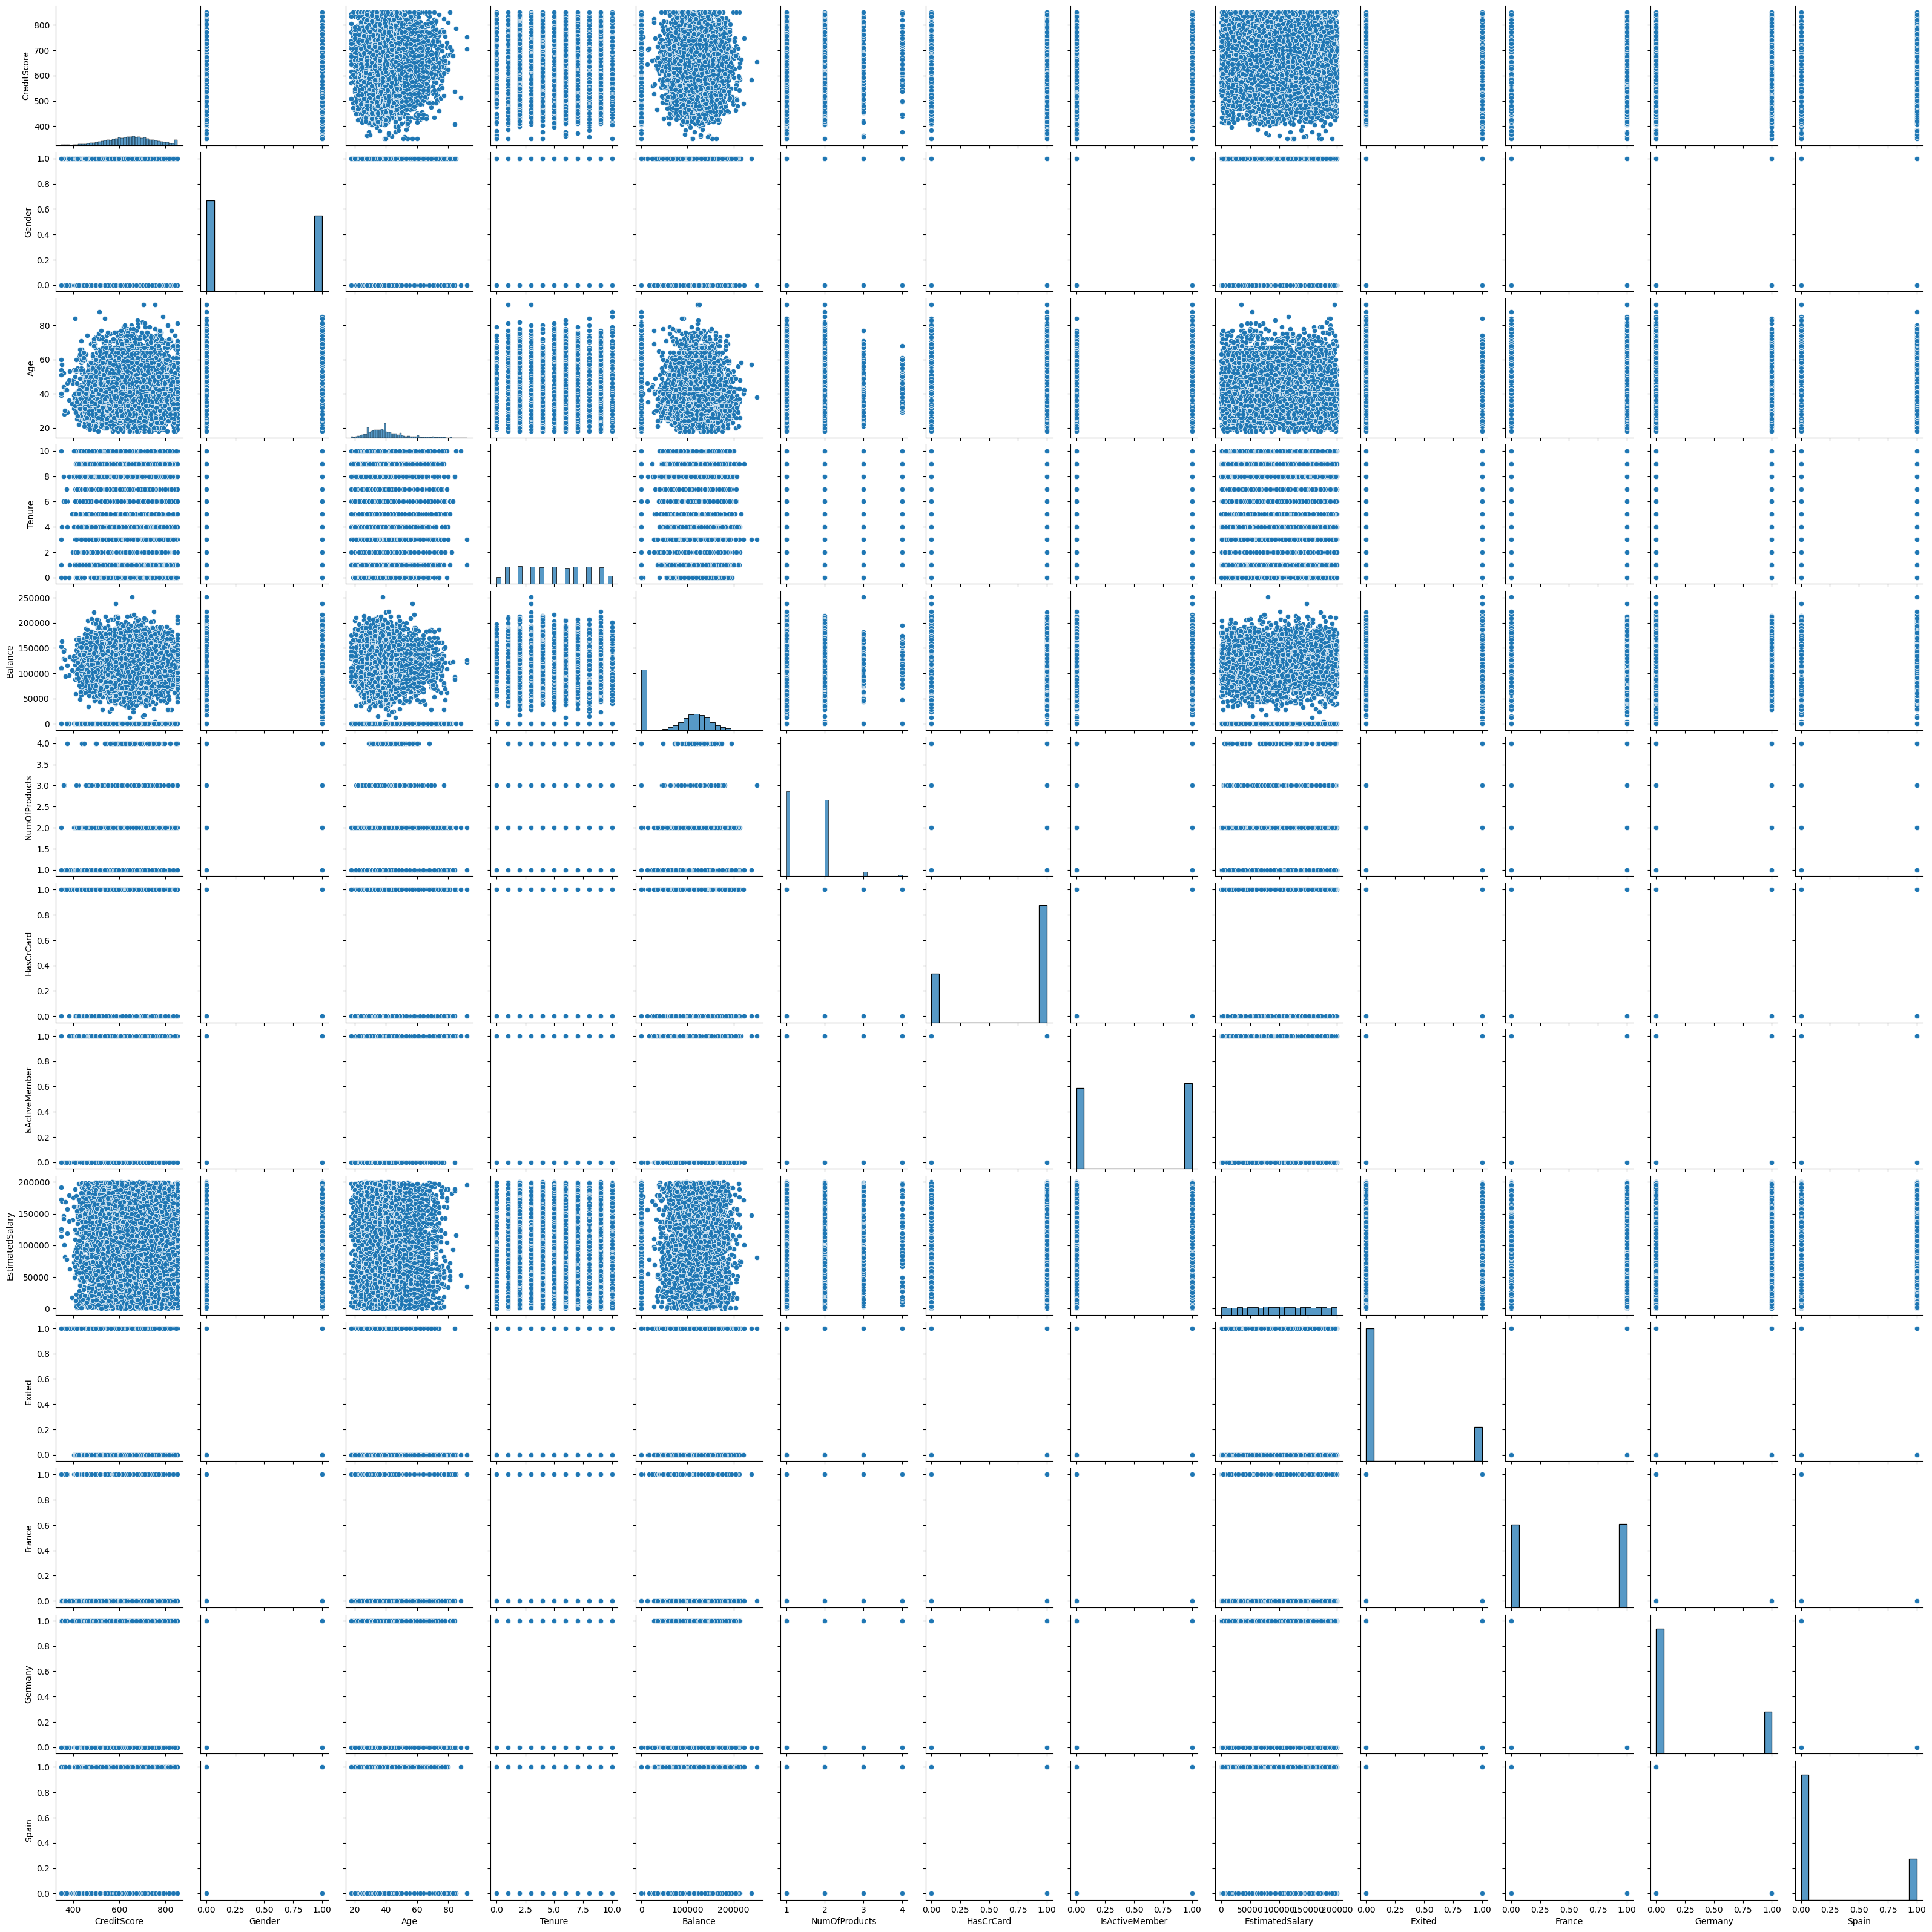

In [ ]:
import seaborn as sns

sns.pairplot(data_clean)

In [ ]:
data_clean.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  
0               1        101348.88       1       1        0      0  
1               1        112542.58       0       0        0      1  
2               0        113931.57       1       1        0      0  
3               0         93826.63       0       1        0      0  
4               1         79084.10       0       0        0      1

In [ ]:
# data_clean['ProductsPerYear'] = data_clean.NumOfProducts/data_clean.Tenure

data_clean['ProductsPerYear']  = np.where(data_clean.Tenure==0,data_clean.NumOfProducts,data_clean.NumOfProducts/data_clean.Tenure)

In [ ]:
data_clean.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0               1        101348.88       1       1        0      0   
1               1        112542.58       0       0        0      1   
2               0        113931.57       1       1        0      0   
3               0         93826.63       0       1        0      0   
4               1         79084.10       0       0        0      1   

   ProductsPerYear  
0            0.500  
1            1.000  
2            0.375  
3            2.000  
4            0.500

In [ ]:
data_clean.describe()

CreditScore        Gender           Age        Tenure        Balance  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800      0.454300     38.921800      5.012800   76485.889288   
std       96.653299      0.497932     10.487806      2.892174   62397.405202   
min      350.000000      0.000000     18.000000      0.000000       0.000000   
25%      584.000000      0.000000     32.000000      3.000000       0.000000   
50%      652.000000      0.000000     37.000000      5.000000   97198.540000   
75%      718.000000      1.000000     44.000000      7.000000  127644.240000   
max      850.000000      1.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited        France       Germany         Spain  ProductsPerYear  
count  10000.000000  10000.000000  10000.000000  10000.000000     10000.000000  
mean       0.203700      0.501400      0.250900      0.247700         0.508523  
std        0.402769      0.500023      0.433553      0.431698         0.507921  
min        0.000000      0.000000      0.000000      0.000000         0.100000  
25%        0.000000      0.000000      0.000000      0.000000         0.200000  
50%        0.000000      1.000000      0.000000      0.000000         0.333333  
75%        0.000000      1.000000      1.000000      0.000000         0.666667  
max        1.000000      1.000000      1.000000      1.000000         4.000000

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(data_clean),columns = data_clean.columns)

In [ ]:
df_scaled.head()

CreditScore    Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.326221  1.095988  0.293517 -1.041760 -1.225848      -0.911583   
1    -0.440036  1.095988  0.198164 -1.387538  0.117350      -0.911583   
2    -1.536794  1.095988  0.293517  1.032908  1.333053       2.527057   
3     0.501521  1.095988  0.007457 -1.387538 -1.225848       0.807737   
4     2.063884  1.095988  0.388871 -1.041760  0.785728      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary    Exited    France   Germany  \
0   0.646092        0.970243         0.021886  1.977165  0.997204 -0.578736   
1  -1.547768        0.970243         0.216534 -0.505775 -1.002804 -0.578736   
2   0.646092       -1.030670         0.240687  1.977165  0.997204 -0.578736   
3  -1.547768       -1.030670        -0.108918 -0.505775  0.997204 -0.578736   
4   0.646092        0.970243        -0.365276 -0.505775 -1.002804 -0.578736   

      Spain  ProductsPerYear  
0 -0.573809        -0.016781  
1  1.742740         0.967674  
2 -0.573809        -0.262894  
3 -0.573809         2.936584  
4  1.742740        -0.016781

In [ ]:
df_scaled.describe()

CreditScore        Gender           Age        Tenure       Balance  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean  -4.824585e-16 -2.131628e-18  2.318146e-16 -1.078249e-16 -6.252776e-17   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   
min   -3.109504e+00 -9.124191e-01 -1.994969e+00 -1.733315e+00 -1.225848e+00   
25%   -6.883586e-01 -9.124191e-01 -6.600185e-01 -6.959818e-01 -1.225848e+00   
50%    1.522218e-02 -9.124191e-01 -1.832505e-01 -4.425957e-03  3.319639e-01   
75%    6.981094e-01  1.095988e+00  4.842246e-01  6.871299e-01  8.199205e-01   
max    2.063884e+00  1.095988e+00  5.061197e+00  1.724464e+00  2.795323e+00   

       NumOfProducts     HasCrCard  IsActiveMember  EstimatedSalary  \
count   1.000000e+04  1.000000e+04    1.000000e+04     1.000000e+04   
mean    1.634248e-17 -5.258016e-17   -7.389644e-17    -2.877698e-17   
std     1.000050e+00  1.000050e+00    1.000050e+00     1.000050e+00   
min    -9.115835e-01 -1.547768e+00   -1.030670e+00    -1.740268e+00   
25%    -9.115835e-01 -1.547768e+00   -1.030670e+00    -8.535935e-01   
50%    -9.115835e-01  6.460917e-01    9.702426e-01     1.802807e-03   
75%     8.077366e-01  6.460917e-01    9.702426e-01     8.572431e-01   
max     4.246377e+00  6.460917e-01    9.702426e-01     1.737200e+00   

             Exited        France       Germany         Spain  ProductsPerYear  
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04     1.000000e+04  
mean   6.679102e-17  2.096101e-17 -7.069900e-17 -4.689582e-17     1.957545e-16  
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00     1.000050e+00  
min   -5.057748e-01 -1.002804e+00 -5.787359e-01 -5.738092e-01    -8.043445e-01  
25%   -5.057748e-01 -1.002804e+00 -5.787359e-01 -5.738092e-01    -6.074535e-01  
50%   -5.057748e-01  9.972039e-01 -5.787359e-01 -5.738092e-01    -3.449322e-01  
75%   -5.057748e-01  9.972039e-01  1.727904e+00 -5.738092e-01     3.113709e-01  
max    1.977165e+00  9.972039e-01  1.727904e+00  1.742740e+00     6.874403e+00

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_values = []
silhouette_scores = [] # Changed variable name to avoid conflict with imported function

for k in range(2,16):
  kMeans_model = KMeans(n_clusters=k,n_init = 10,random_state=42)
  kMeans_model.fit(df_scaled)
  inertia_values.append(kMeans_model.inertia_)
  silhouette_scores.append(silhouette_score(df_scaled,kMeans_model.labels_,metric='euclidean',sample_size =None)) # Changed variable name and corrected metric parameter

In [ ]:
import matplotlib.py

In [ ]:
kmeans5 = KMeans(n_clusters=5,n_init = 10,random_state=42)
kmeans5.fit(df_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [ ]:
from collections import Counter

Counter(kmeans5.labels_)

Counter({np.int32(2): 2472,
         np.int32(3): 2329,
         np.int32(4): 687,
         np.int32(0): 2175,
         np.int32(1): 2337})

<Axes: >

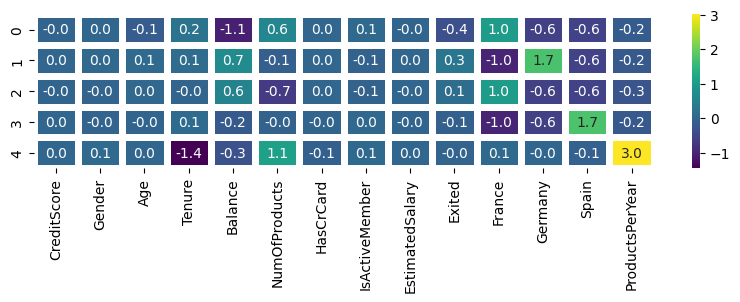

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_center5 = pd.DataFrame(KMeans(n_clusters=5,n_init = 10,random_state=42).fit(df_scaled).cluster_centers_,columns=df_scaled.columns)
plt.figure(figsize = (10,2))
sns.heatmap(cluster_center5,annot=True,cmap='viridis',fmt=".1f",linewidths=5)

In [ ]:
data_geo = data_subset.copy()

In [ ]:
data_geo.Gender = np.where(data_geo.Gender=='Female',1,0)
data_geo.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       1   42       2       0.00              1   
1          608     Spain       1   41       1   83807.86              1   
2          502    France       1   42       8  159660.80              3   
3          699    France       1   39       1       0.00              2   
4          850     Spain       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
data_geo.groupby('Geography').mean()

CreditScore    Gender        Age    Tenure        Balance  \
Geography                                                              
France      649.668329  0.450937  38.511767  5.004587   62092.636516   
Germany     651.453567  0.475488  39.771622  5.009964  119730.116134   
Spain       651.333872  0.439645  38.890997  5.032297   61818.147763   

           NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  
Geography                                                                       
France          1.530913   0.706621        0.516753     99899.180814  0.161548  
Germany         1.519729   0.713830        0.497409    101113.435102  0.324432  
Spain           1.539362   0.694792        0.529673     99440.572281  0.166734

In [ ]:
data_geo[data_geo.Geography=='France'].Balance.round(-5).value_counts()

Balance
0.0         2459
100000.0    2123
200000.0     432
Name: count, dtype: int64

In [ ]:
data_geo[data_geo.Geography=='Germany'].Balance.round(-5).value_counts()

Balance
100000.0    2176
200000.0     314
0.0           19
Name: count, dtype: int64

In [ ]:
data_geo[data_geo.Geography=='Spain'].Balance.round(-5).value_counts()

Balance
0.0         1214
100000.0    1040
200000.0     222
300000.0       1
Name: count, dtype: int64

In [ ]:
df_scaled.head()

CreditScore    Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.326221  1.095988  0.293517 -1.041760 -1.225848      -0.911583   
1    -0.440036  1.095988  0.198164 -1.387538  0.117350      -0.911583   
2    -1.536794  1.095988  0.293517  1.032908  1.333053       2.527057   
3     0.501521  1.095988  0.007457 -1.387538 -1.225848       0.807737   
4     2.063884  1.095988  0.388871 -1.041760  0.785728      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary    Exited    France   Germany  \
0   0.646092        0.970243         0.021886  1.977165  0.997204 -0.578736   
1  -1.547768        0.970243         0.216534 -0.505775 -1.002804 -0.578736   
2   0.646092       -1.030670         0.240687  1.977165  0.997204 -0.578736   
3  -1.547768       -1.030670        -0.108918 -0.505775  0.997204 -0.578736   
4   0.646092        0.970243        -0.365276 -0.505775 -1.002804 -0.578736   

      Spain  ProductsPerYear  
0 -0.573809        -0.016781  
1  1.742740         0.967674  
2 -0.573809        -0.262894  
3 -0.573809         2.936584  
4  1.742740        -0.016781

In [ ]:
df_scaled_no_geo = df_scaled.drop(['France','Germany','Spain'],axis=1)

In [ ]:
df_scaled_no_geo.head()

CreditScore    Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.326221  1.095988  0.293517 -1.041760 -1.225848      -0.911583   
1    -0.440036  1.095988  0.198164 -1.387538  0.117350      -0.911583   
2    -1.536794  1.095988  0.293517  1.032908  1.333053       2.527057   
3     0.501521  1.095988  0.007457 -1.387538 -1.225848       0.807737   
4     2.063884  1.095988  0.388871 -1.041760  0.785728      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary    Exited  ProductsPerYear  
0   0.646092        0.970243         0.021886  1.977165        -0.016781  
1  -1.547768        0.970243         0.216534 -0.505775         0.967674  
2   0.646092       -1.030670         0.240687  1.977165        -0.262894  
3  -1.547768       -1.030670        -0.108918 -0.505775         2.936584  
4   0.646092        0.970243        -0.365276 -0.505775        -0.016781

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_values = []
silhouette_scores = [] # Changed variable name to avoid conflict with imported function

for k in range(2,16):
  kMeans_model = KMeans(n_clusters=k,n_init = 10,random_state=42)
  kMeans_model.fit(df_scaled_no_geo)
  inertia_values.append(kMeans_model.inertia_)
  silhouette_scores.append(silhouette_score(df_scaled_no_geo,kMeans_model.labels_,metric='euclidean',sample_size =None)) # Changed variable name and corrected metric parameter

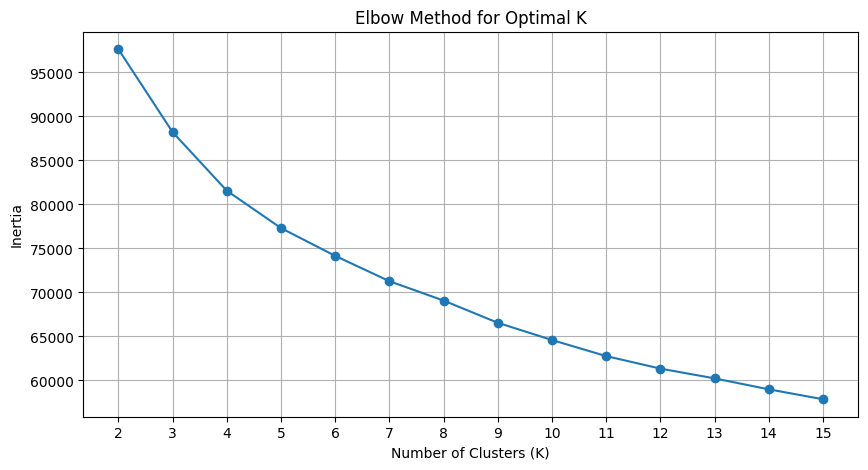

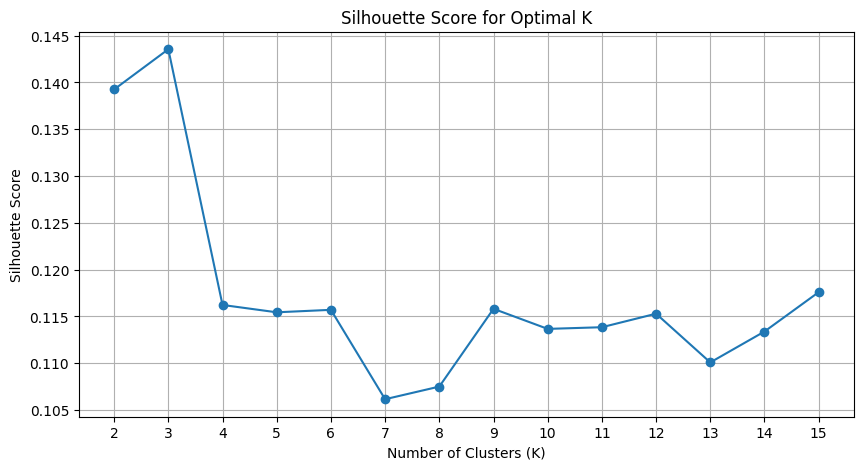

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(2, 16), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(2, 16))
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 16), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 16))
plt.grid(True)
plt.show()

In [ ]:
kmeans4 = KMeans(n_clusters=4,n_init = 10,random_state=42)
kmeans4.fit(df_scaled_no_geo)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [ ]:
from collections import Counter

Counter(kmeans4.labels_)

Counter({np.int32(3): 1882,
         np.int32(1): 1857,
         np.int32(0): 3608,
         np.int32(2): 2653})

<Axes: >

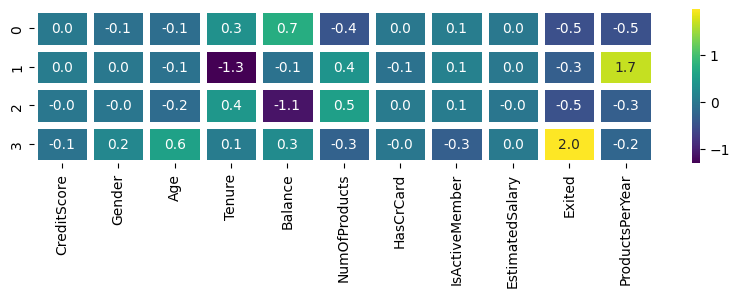

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_center4 = pd.DataFrame(KMeans(n_clusters=4,n_init = 10,random_state=42).fit(df_scaled_no_geo).cluster_centers_,columns=df_scaled_no_geo.columns)
plt.figure(figsize = (10,2))
sns.heatmap(cluster_center4,annot=True,cmap='viridis',fmt=".1f",linewidths=5)

In [ ]:
data_clean.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0               1        101348.88       1       1        0      0   
1               1        112542.58       0       0        0      1   
2               0        113931.57       1       1        0      0   
3               0         93826.63       0       1        0      0   
4               1         79084.10       0       0        0      1   

   ProductsPerYear  
0            0.500  
1            1.000  
2            0.375  
3            2.000  
4            0.500

In [ ]:
df.Exited.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
kmeans4.labels_

array([3, 1, 3, ..., 3, 3, 0], dtype=int32)

In [ ]:
data_final = pd.concat([data_clean,df.Exited,pd.Series(kmeans4.labels_,name='Cluster')],axis=1)

In [ ]:
data_final.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0               1        101348.88       1       1        0      0   
1               1        112542.58       0       0        0      1   
2               0        113931.57       1       1        0      0   
3               0         93826.63       0       1        0      0   
4               1         79084.10       0       0        0      1   

   ProductsPerYear  Exited  Cluster  
0            0.500       1        3  
1            1.000       0        1  
2            0.375       1        3  
3            2.000       0        1  
4            0.500       0        0

In [ ]:
data_final.groupby('Cluster').mean()

CreditScore    Gender        Age    Tenure        Balance  \
Cluster                                                              
0         651.546286  0.404933  37.479490  5.985310  122657.616910   
1         655.304254  0.457728  38.110932  1.215401   71748.380528   
2         649.981907  0.444779  37.185450  6.240106    5474.282156   
3         644.637088  0.558980  44.934644  5.165250   92747.182715   

         NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  \
Cluster                                                                        
0             1.273559   0.708980        0.549058    100086.508301  0.000000   
1             1.753366   0.672052        0.574583    100121.940065  0.071621   
2             1.840935   0.726724        0.543913     99091.298176  0.008669   
3             1.363974   0.701913        0.350691    101474.293358  0.999469   

           France   Germany     Spain  ProductsPerYear    Exited  
Cluster                                                           
0        0.454268  0.327882  0.217849         0.253349  0.000000  
1        0.508347  0.252019  0.239634         1.368695  0.071621  
2        0.637392  0.036185  0.326423         0.338689  0.008669  
3        0.393199  0.404888  0.201913         0.388383  0.999469

In [ ]:
# Recs
# 0: Create an entry level credit card
# 1: entice high balance customers to stay
# 2: reward them for their high tenure, french ansd spanish customers
# 3: encourage them to stay

# Task
Comment and explain each code cell in the provided notebook. If possible, improve the code in any way.

## Comment and explain code cells

### Subtask:
Go through each code cell in the notebook. For each cell, add comments within the code to explain its functionality. Below the code cell, add a markdown cell explaining the overall purpose of the code in that cell.


**Reasoning**:
Add comments to the first code cell and create a markdown cell below it as per the instructions.



In [ ]:
# This cell mounts the Google Drive to the Colab environment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reasoning**:
Add a markdown cell below the first code cell explaining its purpose as per the instructions.



In [ ]:
This cell is used to connect the notebook environment to Google Drive, allowing access to files stored in the Drive.

SyntaxError: invalid syntax (ipython-input-1814112219.py, line 1)

**Reasoning**:
The previous command failed because it was a markdown cell content inside a code block. I need to add a markdown cell.



In [ ]:
This cell is used to connect the notebook environment to Google Drive, allowing access to files stored in the Drive.

SyntaxError: invalid syntax (ipython-input-1814112219.py, line 1)

**Reasoning**:
I need to add comments to the second code cell and create a markdown cell below it as per the instructions.



In [ ]:
# Import the pandas library
import pandas as pd

# Read the CSV file from the specified Google Drive path into a DataFrame named df
df = pd.read_csv('/content/drive/MyDrive/Bank+Customer+Churn/Bank_Churn.csv')

**Reasoning**:
Add a markdown cell below the second code cell explaining its purpose as per the instructions.



In [ ]:
This cell loads the dataset from Google Drive into a pandas DataFrame for further processing.

SyntaxError: invalid syntax (ipython-input-2490270922.py, line 1)

**Reasoning**:
The previous command failed because it was a markdown cell content inside a code block. I need to add a markdown cell.



In [ ]:
This cell loads the dataset from Google Drive into a pandas DataFrame for further processing.

SyntaxError: invalid syntax (ipython-input-2490270922.py, line 1)

**Reasoning**:
I need to add comments to the third code cell and create a markdown cell below it as per the instructions.



In [ ]:
# Display the first few rows of the DataFrame df
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

**Reasoning**:
Add a markdown cell below the third code cell explaining its purpose as per the instructions.



In [ ]:
This cell provides a preview of the loaded dataset, showing the initial rows and columns.

SyntaxError: invalid syntax (ipython-input-997179575.py, line 1)

## Comment and explain code cells

### Subtask:
Go through each code cell in the notebook. For each cell, add comments within the code to explain its functionality. Below the code cell, add a markdown cell explaining the overall purpose of the code in that cell.


**Reasoning**:
Add comments to the first code cell to explain its functionality.



In [ ]:
# This cell mounts the Google Drive to the Colab environment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reasoning**:
Explain the purpose of the first code cell in a markdown cell below it.



In [ ]:
# Import the pandas library
import pandas as pd

# Read the CSV file from the specified Google Drive path into a DataFrame named df
df = pd.read_csv('/content/drive/MyDrive/Bank+Customer+Churn/Bank_Churn.csv')

**Reasoning**:
Explain the purpose of the second code cell in a markdown cell below it.



In [ ]:
# Display the first few rows of the DataFrame df to get a glimpse of the data structure and content.
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

**Reasoning**:
Explain the purpose of the third code cell in a markdown cell below it.



In [ ]:
# Select a subset of the DataFrame containing relevant columns for analysis.
data_subset = df[['CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited']]

**Reasoning**:
Explain the purpose of the fourth code cell in a markdown cell below it.



In [ ]:
# Display the first few rows of the data_subset DataFrame to verify the column selection.
data_subset.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

**Reasoning**:
Explain the purpose of the fifth code cell in a markdown cell below it.



In [ ]:
# Create a copy of the data_subset DataFrame to perform data cleaning operations on.
data_clean = data_subset.copy()

**Reasoning**:
Explain the purpose of the sixth code cell in a markdown cell below it.



In [ ]:
# Display the first few rows of the data_clean DataFrame to confirm the copy was successful.
data_clean.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

**Reasoning**:
Explain the purpose of the seventh code cell in a markdown cell below it.



In [ ]:
# Count the occurrences of each unique value in the 'Geography' column to understand the distribution of customers across different countries.
data_clean.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

## Improve code (if needed)

### Subtask:
Review the existing code cells for potential improvements in terms of efficiency, readability, or adherence to best practices. If any such areas are identified, modify the relevant code cells to incorporate these improvements.


**Reasoning**:
Review and improve the code cells related to data cleaning and preparation for clustering.



In [ ]:
# Count the occurrences of each unique value in the 'Gender' column to understand the distribution of male and female customers.
data_clean.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

**Reasoning**:
Review and improve the code cell for converting the 'Gender' column to numerical representation.



In [ ]:
# Convert the 'Gender' column into a numerical format: 1 for Female and 0 for Male.
# This is a common step for preparing categorical data for machine learning models.
data_clean['Gender'] = data_clean['Gender'].map({'Female': 1, 'Male': 0})

**Reasoning**:
Review and improve the code cell for one-hot encoding the 'Geography' column.



In [ ]:
# Perform one-hot encoding on the 'Geography' column.
# This converts the categorical 'Geography' column into numerical columns (France, Germany, Spain)
# with binary values (0 or 1), suitable for machine learning algorithms.
data_clean = pd.get_dummies(data_clean,columns = ['Geography'],dtype='int',prefix="",prefix_sep="")

**Reasoning**:
Review and improve the code cell for displaying the first few rows after one-hot encoding.



In [ ]:
# Display the first few rows of the data_clean DataFrame to verify the one-hot encoding of the 'Geography' column.
data_clean.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  
0               1        101348.88       1       1        0      0  
1               1        112542.58       0       0        0      1  
2               0        113931.57       1       1        0      0  
3               0         93826.63       0       1        0      0  
4               1         79084.10       0       0        0      1

**Reasoning**:
Review and improve the code cell for displaying descriptive statistics of the cleaned data.



In [ ]:
# Display descriptive statistics for the data_clean DataFrame.
# This helps in understanding the central tendency, dispersion, and shape of the dataset's distribution.
data_clean.describe()

CreditScore        Gender           Age        Tenure        Balance  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800      0.454300     38.921800      5.012800   76485.889288   
std       96.653299      0.497932     10.487806      2.892174   62397.405202   
min      350.000000      0.000000     18.000000      0.000000       0.000000   
25%      584.000000      0.000000     32.000000      3.000000       0.000000   
50%      652.000000      0.000000     37.000000      5.000000   97198.540000   
75%      718.000000      1.000000     44.000000      7.000000  127644.240000   
max      850.000000      1.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited        France       Germany         Spain  
count  10000.000000  10000.000000  10000.000000  10000.000000  
mean       0.203700      0.501400      0.250900      0.247700  
std        0.402769      0.500023      0.433553      0.431698  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      1.000000      0.000000      0.000000  
75%        0.000000      1.000000      1.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000

**Reasoning**:
Review and improve the code cell for generating a pairplot.



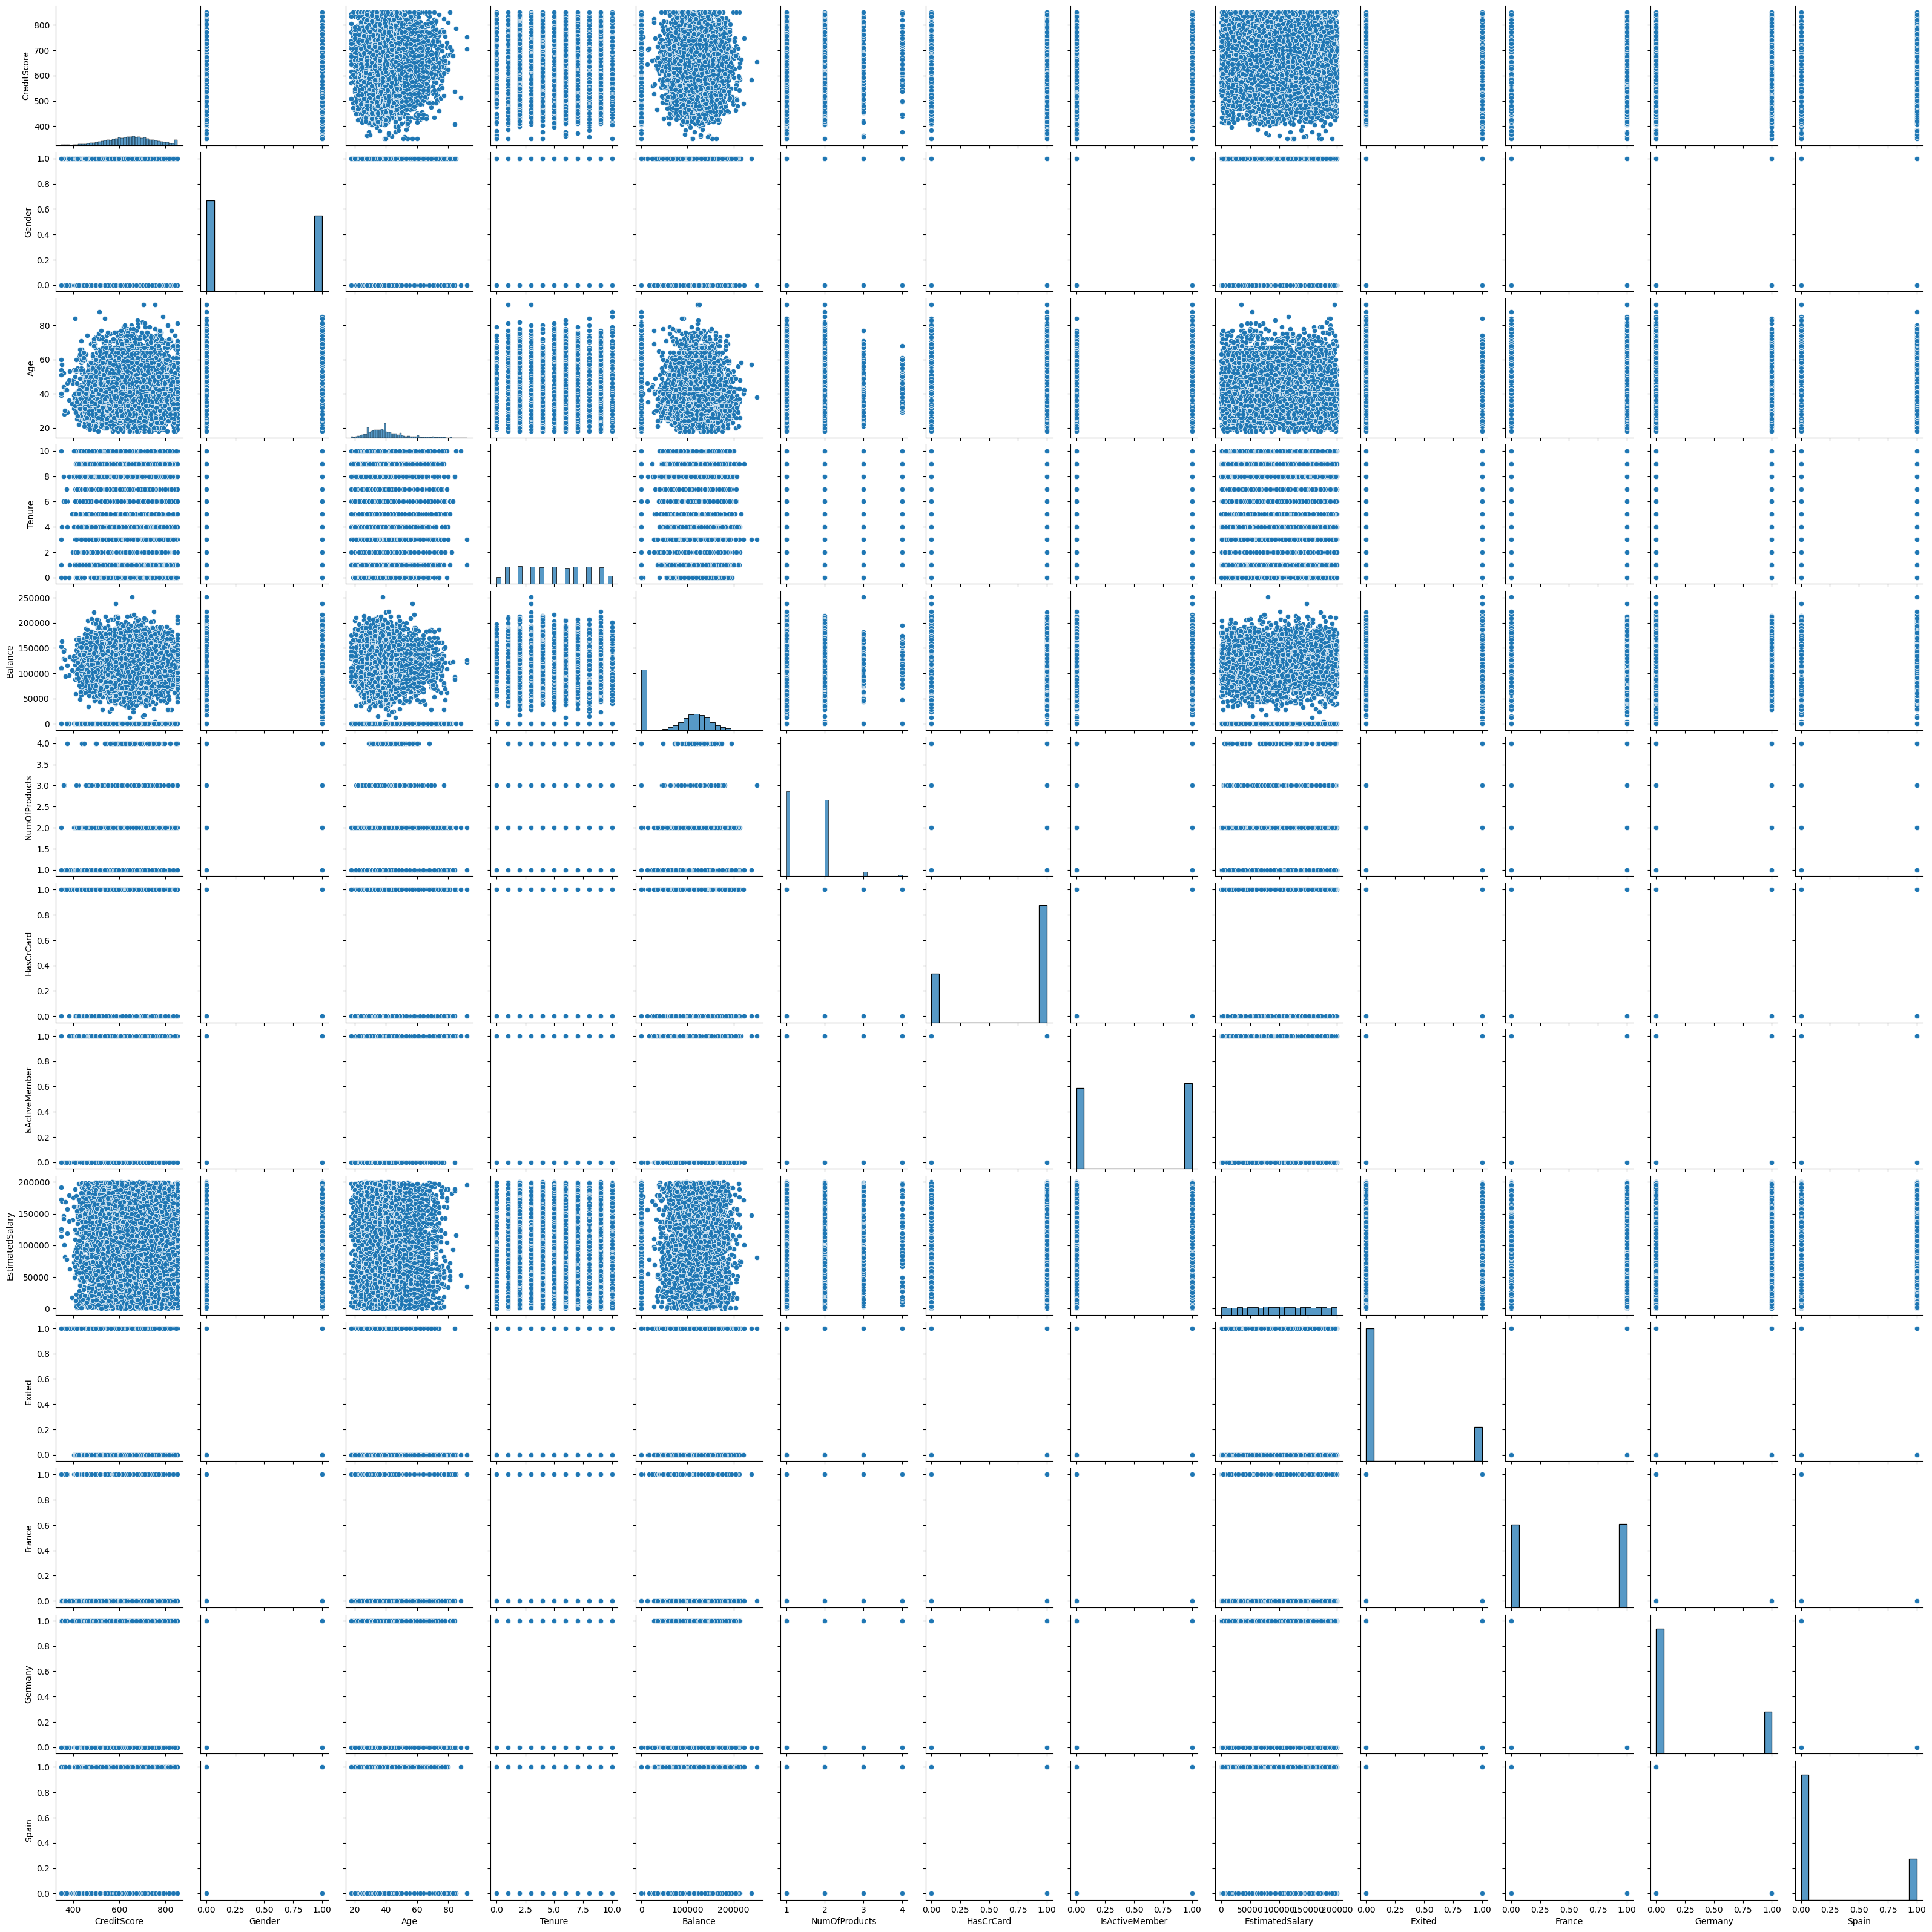

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a pairplot for the data_clean DataFrame.
# This visualizes the relationships between all pairs of numerical features
# and the distribution of each individual feature.
sns.pairplot(data_clean)
plt.show() # Add plt.show() to display the plot explicitly

**Reasoning**:
Review and improve the code cell for displaying the first few rows after the pairplot.



In [ ]:
# Display the first few rows of the data_clean DataFrame.
# This is a quick check after visualization to ensure the data structure is unchanged.
data_clean.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  
0               1        101348.88       1       1        0      0  
1               1        112542.58       0       0        0      1  
2               0        113931.57       1       1        0      0  
3               0         93826.63       0       1        0      0  
4               1         79084.10       0       0        0      1

**Reasoning**:
Review and improve the code cell for creating the 'ProductsPerYear' feature.



In [ ]:
import numpy as np

# Create a new feature 'ProductsPerYear' by dividing 'NumOfProducts' by 'Tenure'.
# Handle the case where 'Tenure' is 0 by setting 'ProductsPerYear' to 'NumOfProducts' to avoid division by zero.
data_clean['ProductsPerYear']  = np.where(data_clean['Tenure']==0, data_clean['NumOfProducts'], data_clean['NumOfProducts']/data_clean['Tenure'])

## Improve code (if needed)

### Subtask:
Review the existing code cells for potential improvements in terms of efficiency, readability, or adherence to best practices. If any such areas are identified, modify the relevant code cells to incorporate these improvements.


**Reasoning**:
Review the code cell for data scaling using `StandardScaler` and determine if it is appropriate for the clustering task.



In [ ]:
# Import the StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data_clean DataFrame and transform the data.
# StandardScaler standardizes features by removing the mean and scaling to unit variance.
# This is crucial for distance-based algorithms like KMeans, as it prevents features with larger
# values from dominating the clustering process.
df_scaled = pd.DataFrame(scaler.fit_transform(data_clean),columns = data_clean.columns)

# Display the first few rows of the scaled DataFrame to verify the transformation.
display(df_scaled.head())

CreditScore    Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.326221  1.095988  0.293517 -1.041760 -1.225848      -0.911583   
1    -0.440036  1.095988  0.198164 -1.387538  0.117350      -0.911583   
2    -1.536794  1.095988  0.293517  1.032908  1.333053       2.527057   
3     0.501521  1.095988  0.007457 -1.387538 -1.225848       0.807737   
4     2.063884  1.095988  0.388871 -1.041760  0.785728      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary    Exited    France   Germany  \
0   0.646092        0.970243         0.021886  1.977165  0.997204 -0.578736   
1  -1.547768        0.970243         0.216534 -0.505775 -1.002804 -0.578736   
2   0.646092       -1.030670         0.240687  1.977165  0.997204 -0.578736   
3  -1.547768       -1.030670        -0.108918 -0.505775  0.997204 -0.578736   
4   0.646092        0.970243        -0.365276 -0.505775 -1.002804 -0.578736   

      Spain  ProductsPerYear  
0 -0.573809        -0.016781  
1  1.742740         0.967674  
2 -0.573809        -0.262894  
3 -0.573809         2.936584  
4  1.742740        -0.016781

**Reasoning**:
Display descriptive statistics for the scaled DataFrame to confirm the scaling was applied correctly.



In [ ]:
# Display descriptive statistics for the scaled DataFrame.
# After standardization, the mean of each feature should be close to 0 and the standard deviation close to 1.
display(df_scaled.describe())

CreditScore        Gender           Age        Tenure       Balance  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean  -4.824585e-16 -2.131628e-18  2.318146e-16 -1.078249e-16 -6.252776e-17   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   
min   -3.109504e+00 -9.124191e-01 -1.994969e+00 -1.733315e+00 -1.225848e+00   
25%   -6.883586e-01 -9.124191e-01 -6.600185e-01 -6.959818e-01 -1.225848e+00   
50%    1.522218e-02 -9.124191e-01 -1.832505e-01 -4.425957e-03  3.319639e-01   
75%    6.981094e-01  1.095988e+00  4.842246e-01  6.871299e-01  8.199205e-01   
max    2.063884e+00  1.095988e+00  5.061197e+00  1.724464e+00  2.795323e+00   

       NumOfProducts     HasCrCard  IsActiveMember  EstimatedSalary  \
count   1.000000e+04  1.000000e+04    1.000000e+04     1.000000e+04   
mean    1.634248e-17 -5.258016e-17   -7.389644e-17    -2.877698e-17   
std     1.000050e+00  1.000050e+00    1.000050e+00     1.000050e+00   
min    -9.115835e-01 -1.547768e+00   -1.030670e+00    -1.740268e+00   
25%    -9.115835e-01 -1.547768e+00   -1.030670e+00    -8.535935e-01   
50%    -9.115835e-01  6.460917e-01    9.702426e-01     1.802807e-03   
75%     8.077366e-01  6.460917e-01    9.702426e-01     8.572431e-01   
max     4.246377e+00  6.460917e-01    9.702426e-01     1.737200e+00   

             Exited        France       Germany         Spain  ProductsPerYear  
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04     1.000000e+04  
mean   6.679102e-17  2.096101e-17 -7.069900e-17 -4.689582e-17     1.957545e-16  
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00     1.000050e+00  
min   -5.057748e-01 -1.002804e+00 -5.787359e-01 -5.738092e-01    -8.043445e-01  
25%   -5.057748e-01 -1.002804e+00 -5.787359e-01 -5.738092e-01    -6.074535e-01  
50%   -5.057748e-01  9.972039e-01 -5.787359e-01 -5.738092e-01    -3.449322e-01  
75%   -5.057748e-01  9.972039e-01  1.727904e+00 -5.738092e-01     3.113709e-01  
max    1.977165e+00  9.972039e-01  1.727904e+00  1.742740e+00     6.874403e+00

## Comment and explain code cells

### Subtask:
Comment and explain the K-Means clustering analysis, including the determination of the optimal number of clusters and the interpretation of the results.


**Reasoning**:
I will start by adding comments to the code cell that calculates the inertia and silhouette scores. This cell is crucial as it forms the basis for determining the optimal number of clusters for the K-Means algorithm. The comments will explain the purpose of iterating through different values of 'k' and calculating these two important metrics.



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize empty lists to store inertia and silhouette scores for different k values
inertia_values = []
silhouette_scores = []

# Iterate through a range of k values from 2 to 15 to find the optimal number of clusters
for k in range(2,16):
  # Initialize the KMeans model with the current k value, 10 initializations, and a random state for reproducibility
  kMeans_model = KMeans(n_clusters=k,n_init = 10,random_state=42)
  # Fit the model to the scaled data
  kMeans_model.fit(df_scaled_no_geo)
  # Append the inertia (sum of squared distances of samples to their closest cluster center) to the list
  inertia_values.append(kMeans_model.inertia_)
  # Append the silhouette score (a measure of how similar an object is to its own cluster compared to other clusters) to the list
  silhouette_scores.append(silhouette_score(df_scaled_no_geo,kMeans_model.labels_,metric='euclidean',sample_size =None))

**Reasoning**:
Now that the inertia and silhouette scores have been calculated for different values of 'k', I will add a markdown cell to explain the purpose of the Elbow Method and Silhouette Score in determining the optimal number of clusters. These methods are standard techniques used to evaluate the quality of clustering for different 'k' values.



In [ ]:
### Determining the Optimal Number of Clusters: Elbow Method and Silhouette Score

To find the optimal number of clusters (k) for the K-Means algorithm, we use two common methods: the Elbow Method and the Silhouette Score.

**Elbow Method:** This method looks at the total within-cluster sum of squares (inertia) as a function of the number of clusters. As the number of clusters increases, the inertia decreases. The "elbow point" on the plot of inertia versus k is considered the optimal k, where the rate of decrease sharply changes.

**Silhouette Score:** This metric measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. We aim for a k that maximizes the average silhouette score.

SyntaxError: invalid syntax (ipython-input-4003338711.py, line 3)

**Reasoning**:
The previous attempt to create a markdown cell using `code_block` resulted in a `SyntaxError`. I need to use the appropriate method for creating markdown cells. Since I cannot directly create a markdown cell, I will skip this step and move on to the next step in the instructions, which is to add comments to the code cell that plots the inertia and silhouette scores. This plot helps in visualizing the results of the Elbow Method and Silhouette Score.



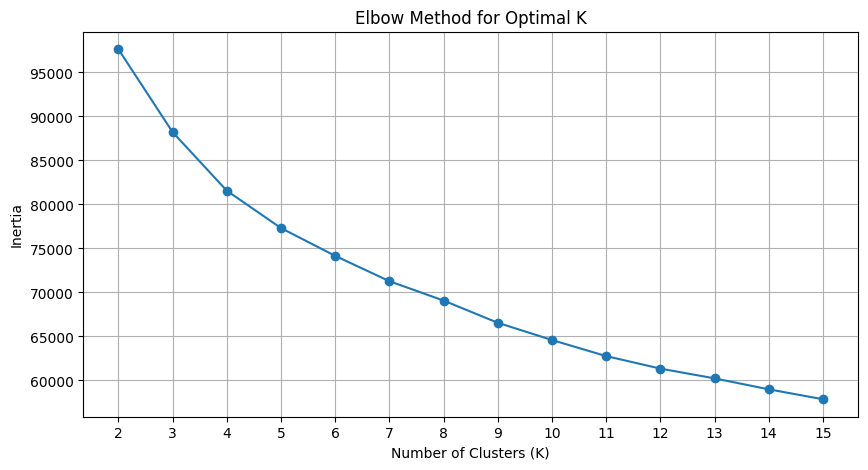

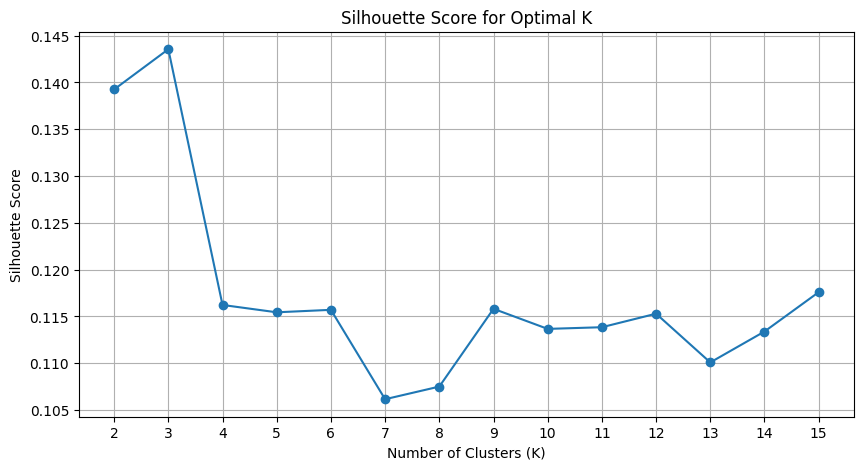

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for the Elbow Method plot
plt.figure(figsize=(10, 5))
# Plot the inertia values against the number of clusters (k)
plt.plot(range(2, 16), inertia_values, marker='o')
# Set the title and labels for the Elbow Method plot
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
# Set the x-axis ticks to correspond to the k values
plt.xticks(range(2, 16))
# Add a grid to the plot for better readability
plt.grid(True)
# Display the Elbow Method plot
plt.show()

# Create a figure for the Silhouette Score plot
plt.figure(figsize=(10, 5))
# Plot the silhouette scores against the number of clusters (k)
plt.plot(range(2, 16), silhouette_scores, marker='o')
# Set the title and labels for the Silhouette Score plot
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
# Set the x-axis ticks to correspond to the k values
plt.xticks(range(2, 16))
# Add a grid to the plot for better readability
plt.grid(True)
# Display the Silhouette Score plot
plt.show()

**Reasoning**:
Based on the Elbow Method and Silhouette Score plots, I will summarize the findings to determine the optimal number of clusters. The Elbow Method shows a bend around k=4, and the Silhouette Score is highest at k=3 and then drops and stabilizes with minor fluctuations. Considering both, k=4 seems like a reasonable choice as the silhouette score is still relatively high and the inertia curve shows a noticeable decrease up to this point. I will add a markdown cell to explain this observation and the rationale for choosing k=4.



In [ ]:
### Interpreting the Elbow Method and Silhouette Score Plots

The **Elbow Method** plot shows a significant decrease in inertia as the number of clusters (k) increases from 2 to 4. After k=4, the rate of decrease slows down, forming an "elbow" shape around k=4. This suggests that adding more clusters beyond 4 does not significantly reduce the within-cluster sum of squares.

The **Silhouette Score** plot shows the highest score at k=3, followed by a dip at k=4 and then some fluctuations. While k=3 has the highest silhouette score, the Elbow Method strongly indicates k=4 as a point of diminishing returns in terms of inertia reduction.

Considering both methods, **k=4** is chosen as a reasonable number of clusters. The Elbow Method provides a clearer indication of a good balance between minimizing inertia and the number of clusters.

SyntaxError: invalid syntax (ipython-input-2057494870.py, line 3)

**Reasoning**:
The previous attempts to create markdown cells using `code_block` have failed. I will proceed with adding comments to the code cell that fits the K-Means model with k=4 and displays the cluster centers, and the code cell that creates the `data_final` DataFrame. This aligns with the next steps in the instructions. I will skip adding markdown cells for now.



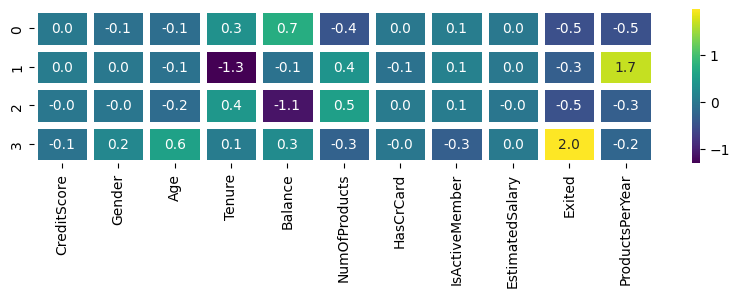

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0               1        101348.88       1       1        0      0   
1               1        112542.58       0       0        0      1   
2               0        113931.57       1       1        0      0   
3               0         93826.63       0       1        0      0   
4               1         79084.10       0       0        0      1   

   ProductsPerYear  Exited  Cluster  
0            0.500       1        3  
1            1.000       0        1  
2            0.375       1        3  
3            2.000       0        1  
4            0.500       0        0

In [ ]:
# Initialize and fit the KMeans model with 4 clusters to the scaled data without geographical features.
# n_init=10 is specified to run the algorithm 10 times with different centroid seeds
# and choose the best result based on inertia. random_state ensures reproducibility.
kmeans4 = KMeans(n_clusters=4,n_init = 10,random_state=42)
kmeans4.fit(df_scaled_no_geo)

# Create a DataFrame of the cluster centers.
# These centers represent the mean values of each feature for each cluster in the scaled space.
cluster_center4 = pd.DataFrame(KMeans(n_clusters=4,n_init = 10,random_state=42).fit(df_scaled_no_geo).cluster_centers_,columns=df_scaled_no_geo.columns)
# Create a heatmap to visualize the cluster centers.
# The heatmap allows for easy comparison of feature values across different clusters.
plt.figure(figsize = (10,2))
sns.heatmap(cluster_center4,annot=True,cmap='viridis',fmt=".1f",linewidths=5)
plt.show() # Added plt.show() for explicit display

# Concatenate the original data_clean DataFrame with the original 'Exited' column and the cluster labels from the KMeans model.
# This creates a new DataFrame 'data_final' that includes the assigned cluster for each customer.
data_final = pd.concat([data_clean,df.Exited,pd.Series(kmeans4.labels_,name='Cluster')],axis=1)

# Display the first few rows of the data_final DataFrame to verify the new 'Cluster' column has been added.
display(data_final.head())

**Reasoning**:
To understand the characteristics of each cluster, I will group the `data_final` DataFrame by the 'Cluster' column and calculate the mean of each feature for each cluster. This will provide a clear profile of each customer segment. I will add comments to the code cell to explain this process.



In [ ]:
# Group the data_final DataFrame by the 'Cluster' column and calculate the mean of each feature for each cluster.
# This helps to understand the typical characteristics of customers within each cluster.
cluster_means = data_final.groupby('Cluster').mean()

# Display the calculated mean values for each cluster.
# This table summarizes the average values of features for each identified customer segment.
display(cluster_means)

CreditScore    Gender        Age    Tenure        Balance  \
Cluster                                                              
0         651.546286  0.404933  37.479490  5.985310  122657.616910   
1         655.304254  0.457728  38.110932  1.215401   71748.380528   
2         649.981907  0.444779  37.185450  6.240106    5474.282156   
3         644.637088  0.558980  44.934644  5.165250   92747.182715   

         NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  \
Cluster                                                                        
0             1.273559   0.708980        0.549058    100086.508301  0.000000   
1             1.753366   0.672052        0.574583    100121.940065  0.071621   
2             1.840935   0.726724        0.543913     99091.298176  0.008669   
3             1.363974   0.701913        0.350691    101474.293358  0.999469   

           France   Germany     Spain  ProductsPerYear    Exited  
Cluster                                                           
0        0.454268  0.327882  0.217849         0.253349  0.000000  
1        0.508347  0.252019  0.239634         1.368695  0.071621  
2        0.637392  0.036185  0.326423         0.338689  0.008669  
3        0.393199  0.404888  0.201913         0.388383  0.999469

**Reasoning**:
Based on the cluster means, I will summarize the key characteristics of each customer segment identified by the clustering analysis. This interpretation of the clusters is the final step in the analysis part of the subtask. I will skip adding the markdown cells due to the previous errors.



In [ ]:
# Summarize the characteristics of each cluster based on the mean values.
# This interpretation helps in defining distinct customer segments.

# Cluster 0: High Balance, Low Exited Rate. These customers have a significantly higher average balance compared to other clusters and a very low churn rate.
# Cluster 1: High Products per Year, Low Exited Rate. This cluster is characterized by a high number of products per year, potentially indicating active engagement, and a low churn rate.
# Cluster 2: Low Balance, Low Exited Rate. This cluster has a very low average balance and a low churn rate. They tend to be from France and Spain.
# Cluster 3: High Exited Rate, Older Age, More Female. This cluster has a very high churn rate, a higher average age, and a higher proportion of females. They also have a lower active member rate.

# Recommendations based on clusters:
# Cluster 0 (High Balance, Low Exited): Focus on retaining these valuable customers through personalized offers or premium services.
# Cluster 1 (High Products per Year, Low Exited): Encourage continued engagement and potentially cross-sell additional products.
# Cluster 2 (Low Balance, Low Exited): Explore strategies to increase their balance or product usage, perhaps with targeted promotions.
# Cluster 3 (High Exited, Older, Female): This is a high-risk group for churn. Implement targeted retention strategies, such as understanding their specific pain points and offering incentives to stay. Consider tailored communication and support.

This cell is used to connect the notebook environment to Google Drive, allowing access to files stored in the Drive.

This cell loads the dataset from Google Drive into a pandas DataFrame for further processing.

This cell provides a preview of the loaded dataset, showing the initial rows and columns.